In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('db.csv', on_bad_lines='skip', sep='\t')

In [3]:
df

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале! ✌️️...,2017-02-28 19:55:32
1,channel1101170442,👑 Награждение победительницы конкурса красоты ...,2017-03-03 18:33:24
2,channel1101170442,🐍 Американский селекционер Джастин Кобылка пот...,2017-03-09 17:11:06
3,channel1101170442,"А вы за участие России в конкурсе \""Евровидени...",2017-03-14 11:13:27
4,channel1101170442,"Не болейте, друзья!",2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,"Порошенко заявил российским пранкерам, предста...",2022-11-17 16:06:13
118281,channel1101170442,"Израиль сообщил, что завершил испытания морско...",2022-11-17 16:06:57


# Removing stopwords

In [4]:
#pip install nltk

In [5]:
import nltk

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [7]:
stopsRUS = stopwords.words('russian')
stopsENG = stopwords.words('english')

stopsRUS.remove('не')
stopsENG.remove('not')

In [8]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewshatalov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopsRUS)
print(stopsENG)

['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем',

# removing emojies

In [10]:
import re
df_without_emoji = df

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df_without_emoji['message'] = df_without_emoji['message'].apply(deEmojify)

In [11]:
df_without_emoji

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале! Вс...,2017-02-28 19:55:32
1,channel1101170442,Награждение победительницы конкурса красоты с...,2017-03-03 18:33:24
2,channel1101170442,Американский селекционер Джастин Кобылка потр...,2017-03-09 17:11:06
3,channel1101170442,"А вы за участие России в конкурсе \""Евровидени...",2017-03-14 11:13:27
4,channel1101170442,"Не болейте, друзья!",2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,"Порошенко заявил российским пранкерам, предста...",2022-11-17 16:06:13
118281,channel1101170442,"Израиль сообщил, что завершил испытания морско...",2022-11-17 16:06:57


In [12]:
#nltk.download('punkt')

# Removing signs

In [13]:
df_without_signs = df_without_emoji

def deSigns(text):
    regrex_pattern = re.compile(pattern = '[!@"“’«»#\\\\$%&\'()*+,—/:;<=>?^_`{|}~\[\]]', flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
#def deSignsBackSlash(text):
#    regrex_pattern = re.compile(pattern = '\\\\', flags = re.UNICODE)
#    return regrex_pattern.sub(r'',text)

df_without_signs['message'] = df_without_signs['message'].apply(deSigns)
#df_without_signs['message'] = df_without_signs['message'].apply(deSignsBackSlash

In [14]:
df_without_signs

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале Все...,2017-02-28 19:55:32
1,channel1101170442,Награждение победительницы конкурса красоты с...,2017-03-03 18:33:24
2,channel1101170442,Американский селекционер Джастин Кобылка потр...,2017-03-09 17:11:06
3,channel1101170442,А вы за участие России в конкурсе Евровидение,2017-03-14 11:13:27
4,channel1101170442,Не болейте друзья,2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,Порошенко заявил российским пранкерам представ...,2022-11-17 16:06:13
118281,channel1101170442,Израиль сообщил что завершил испытания морской...,2022-11-17 16:06:57


# Lemmatization

In [15]:
#pip install pymorphy2

In [16]:
import pymorphy2

In [17]:
%%time
df_normal = df_without_signs

morph = pymorphy2.MorphAnalyzer()

def converter (sentence):
    list = []
    words = sentence.split()
    for item in words:
        list.append(morph.parse(item)[0].normal_form)
    return ' '.join(list) 

df_normal['message'] = df_normal['message'].apply(converter)

CPU times: user 7min 5s, sys: 888 ms, total: 7min 6s
Wall time: 7min 6s


In [18]:
df_normal

,from_id,message,date
0,channel1101170442,приветствовать весь в наш telegram-канал всегд...,2017-02-28 19:55:32
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06
3,channel1101170442,а вы за участие россия в конкурс евровидение,2017-03-14 11:13:27
4,channel1101170442,не болеть друг,2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29
118279,channel1101170442,украинский эксперт допустить на место падение ...,2022-11-17 15:57:53
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13
118281,channel1101170442,израиль сообщить что завершить испытание морск...,2022-11-17 16:06:57


# Tokenizing

In [19]:
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopsRUS)]))

In [20]:
df_tokenized = df_without_emoji
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

df_tokenized['tokenized'] = df_tokenized.apply(lambda x: tokenize(x['message']), axis=1)

In [21]:
df_tokenized

,from_id,message,date,tokenized
0,channel1101170442,приветствовать весь наш telegram-канал курс кл...,2017-02-28 19:55:32,"[приветствовать, весь, наш, курс, ключевой, со..."
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24,"[награждение, победительница, конкурс, красота..."
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06,"[американский, селекционер, джастин, кобылка, ..."
3,channel1101170442,участие россия конкурс евровидение,2017-03-14 11:13:27,"[участие, россия, конкурс, евровидение]"
4,channel1101170442,не болеть друг,2017-03-14 19:49:56,"[не, болеть, друг]"
...,...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29,"[брифинг, минобороны, россия]"
118279,channel1101170442,украинский эксперт допустить место падение рак...,2022-11-17 15:57:53,"[украинский, эксперт, допустить, место, падени..."
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13,"[порошенко, заявить, российский, пранкер, пред..."
118281,channel1101170442,израиль сообщить завершить испытание морской с...,2022-11-17 16:06:57,"[израиль, сообщить, завершить, испытание, морс..."


# Tf idf tokenizing

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
v = TfidfVectorizer()
x = v.fit_transform(df_tokenized['message'])

In [24]:
print(x.toarray()[100000])

[0. 0. 0. ... 0. 0. 0.]


# Matrix of tf idf cosine simularities

In [25]:
from sklearn.metrics.pairwise import linear_kernel

In [26]:
cosine_similarities = linear_kernel(x[10000], x[10000]).flatten()
cosine_similarities

array([1.])

In [27]:
def cosine_similarity_for_ftidf(i, j):
    if j < i:
        return b[j][i]
    cosine_similarities = linear_kernel(x[i], x[j]).flatten()
    return cosine_similarities

In [28]:
%%time
a = []
b = []
for i in range(0, 1000):
    for j in range(0, 1000):
        a.append(cosine_similarity_for_ftidf(i, j))
    b.append(a)
    a = []

CPU times: user 2min 19s, sys: 401 ms, total: 2min 19s
Wall time: 2min 19s


In [29]:
#pd.set_option('display.max_rows', None)

# Matrix of date intervals

In [30]:
from datetime import datetime

In [31]:
def date_in_datetime(text):
    date = datetime.strptime(text, "%Y-%m-%d %H:%M:%S")
    return date

In [32]:
def date_interval(date_first, date_second):
    date1 = date_in_datetime(date_first)
    date2 = date_in_datetime(date_second)
    if date1 < date2:
        date3 = date2 - date1
    else:
        date3 = date1 - date2
    return date3.days * 24 + date3.seconds / 3600

In [33]:
#date1 = date_in_hours('2017-02-28 19:55:32')
#date2 = date_in_hours('2022-11-17 16:08:27')

In [34]:
#date_interval('2022-11-17 16:08:27', '2017-02-28 19:55:32')

In [35]:
df_tokenized.message[0]

'приветствовать весь наш telegram-канал курс ключевой событие'

In [36]:
len(df_tokenized)

118283

In [37]:
date_vec = []
for i in range(0, len(df_tokenized)):
    date_vec.append(df_tokenized.date[i])
    
min_time = date_interval(date_vec[0], date_vec[0])
    
max_time = date_interval(date_vec[0], date_vec[999])

def get_interval(i, j):
    if j < i:
        return time_matrix[j][i]
    return ((date_interval(date_vec[i], date_vec[j]) - min_time) / (max_time - min_time))

In [38]:
import math

In [39]:
%%time
time_matrix = []
time_row = []
for i in range(0, 1000):
    for j in range(0, 1000):
        time_row.append(get_interval(i, j))
    time_matrix.append(time_row)
    time_row = []

CPU times: user 5.81 s, sys: 30.7 ms, total: 5.84 s
Wall time: 5.83 s


In [40]:
time_matrix[0][999]

1.0

# Matrix of distances

In [41]:
import numpy as np

In [42]:
#len(sim_matrix[999])

In [43]:
def sim(i, j):
    if j < i:
        return sim_matrix[j][i]
    return float((1 + b[i][j]) * (1 + time_matrix[i][j]) )

In [44]:
sim_matrix = []
sim_row = []
for i in range(0, 1000):
    for j in range(0, 1000):
        sim_row.append(sim(i, j))
    sim_matrix.append(sim_row)
    sim_row = []

In [45]:
sim_np_matrix = np.matrix(sim_matrix)

In [46]:
import scipy.cluster.hierarchy as sch

In [47]:
from scipy.cluster.hierarchy import dendrogram

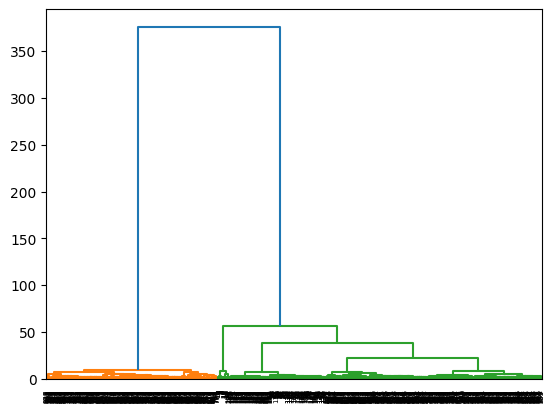

CPU times: user 5.01 s, sys: 103 ms, total: 5.11 s
Wall time: 4.6 s


<Figure size 20000x20000 with 0 Axes>

<Figure size 20000x20000 with 0 Axes>

In [48]:
%%time
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(sim_matrix, method = 'ward'))
plt.show()
plt.figure(figsize=(200, 200))

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=250, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)

In [53]:
clusters

array([115, 128,  46, 128,  46,  46,  46,  90,  90,  46,  90,  90,  45,
        45,  45, 125, 125, 125, 125, 121, 114, 124, 124, 124,  26, 124,
       124, 124,  26,  26, 124,  26,  26, 124,  14,  26,  26,  26,  14,
        14,  26,  14,   4,  51,  26,  26,  14,  26,  26,  26,  14,  26,
        97,  97,  26,  14,  14,  26,  14,  14,  51,  59,  59,  59,  14,
        14,  59,  59,  14,  85,  26,  14,   4,  92,  92,   4,   4,   4,
        14,  14,  14,  85,  14, 110, 110,  14, 106,  29,  14, 100,  97,
        92,   4,  14, 106,  14,  92,  14,   4,  14,  14,  14,  14,  14,
        14,  14,  14,  14,  14,  14,  14,  14, 142,  59,   4, 106,  14,
       106,  35, 106, 106, 104,  29,  14,  89,  89,  14,  35, 100,  29,
        29,  29,  14,  14,  14,  14,   4,  14,  55,  14,  31,  29,  31,
        14,  31, 104,  31,  35,  17,  35,  35,  31,   4,  31,  31,  31,
        31,  31,  29,  35,  31,  31,  29, 100,  31,  31,  31,  14,  31,
        31,  31,  55,  55,  35,  31,  31,  31,  31,  48,  31,  3

In [201]:
plt.scatter(x=[:1], y=[:1], c = df_tokenized_1000.cluster, cmap='rainbow' )

SyntaxError: invalid syntax (2569620209.py, line 1)

TypeError: list indices must be integers or slices, not tuple

array([12])

In [174]:
df_tokenized_1000 = df_tokenized.drop(index=range(1000, 118283))

In [175]:
df_tokenized_1000

,from_id,message,date,tokenized
0,channel1101170442,приветствовать весь наш telegram-канал курс кл...,2017-02-28 19:55:32,"[приветствовать, весь, наш, курс, ключевой, со..."
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24,"[награждение, победительница, конкурс, красота..."
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06,"[американский, селекционер, джастин, кобылка, ..."
3,channel1101170442,участие россия конкурс евровидение,2017-03-14 11:13:27,"[участие, россия, конкурс, евровидение]"
4,channel1101170442,не болеть друг,2017-03-14 19:49:56,"[не, болеть, друг]"
...,...,...,...,...
995,channel1101170442,президент также напомнить жертва пострадать вр...,2019-08-19 19:07:15,"[президент, также, напомнить, жертва, пострада..."
996,channel1101170442,сша испытать крылатый ракета запретить дрсмд,2019-08-19 19:45:39,"[сша, испытать, крылатый, ракета, запретить, д..."
997,channel1101170442,пентагон сообщить испытанный ракета вариант то...,2019-08-19 22:34:21,"[пентагон, сообщить, испытанный, ракета, вариа..."
998,channel1101170442,пират похитить россиянин берег камерун выйти с...,2019-08-20 09:46:46,"[пират, похитить, россиянин, берег, камерун, в..."


In [176]:
df_tokenized_1000['cluster'] = clusters

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not rainbow

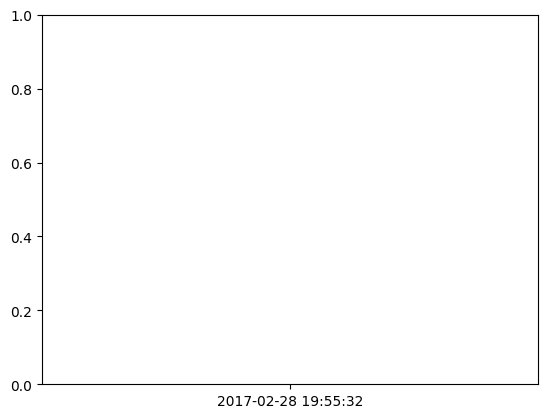

In [189]:
df_tokenized_1000.plot.scatter(x = 'date', y = 'cluster', c = '')

In [202]:
import seaborn as sns

In [207]:
sns.pairplot(df[['message', 'date', 'index']])

KeyError: "['index'] not in index"

<AxesSubplot: ylabel='date'>

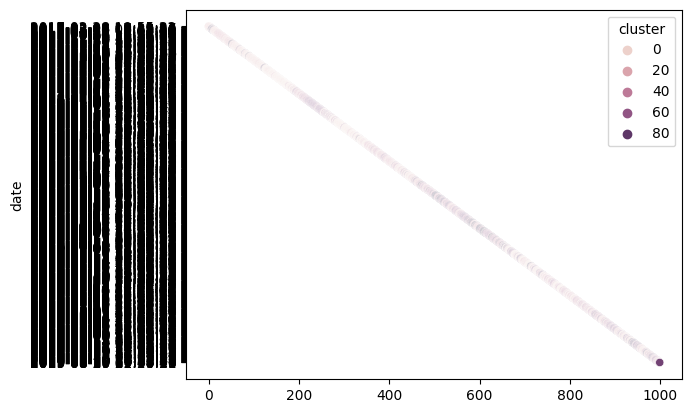

In [212]:
sns.scatterplot(x = df_tokenized_1000.index, y = df_tokenized_1000['date'], hue = df_tokenized_1000['cluster'])